In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
def dfPerYear(year):
    
    df = pd.read_csv('preprocessed/processed_data.csv')
    del df['Unnamed: 0']
    
    kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]
    
    data = {'Kanton': [],
        year: []
        }

    df2 = pd.DataFrame(data)
    
    for i in kantons:
        x = df.loc[df['Kanton'] == i, year].sum()

        dfLoop= pd.DataFrame({"Kanton":[i],
                              year:[x]})
        
        df2 = df2.append(dfLoop)
        
    return df2



In [26]:
def dfHeatMapCantons():
    
    years = ["1860","1870", "1880","1890","1900","1910","1920","1930","1940","1950","1960","1970","1980","1990","2000"]

    dfYears = dfPerYear('1850')

    for i in years:
        dfUnused = dfPerYear(i)
        dfYears = pd.merge(dfYears,dfUnused, on= 'Kanton')    
    
    return dfYears


In [27]:
years = ["1860","1870", "1880","1890","1900","1910","1920","1930","1940","1950","1960","1970","1980","1990","2000"]
kantons = ["AG","AI","AR","BE","BL","BS","FR","GE","GL","GR","JU","LU","NE","NW","OW","SG","SH","SO","SZ","TG","TI","UR","VD","VS","ZG","ZH"]
   
dfYears = dfHeatMapCantons()
    
pd.DataFrame(np.random.randint(low=10000, high=200000, size=(15, 26)), index=years, columns=kantons)
dfYears.style.background_gradient(cmap='YlOrRd')

,Kanton,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
0,AG,199852.000000,194208.000000,198718.000000,198357.000000,193580.000000,206498.000000,230634.000000,240776.000000,259644.000000,270463.000000,300782.000000,360940.000000,433284.000000,453442.000000,507508.000000,547493.000000
1,AI,11272.000000,12000.000000,11922.000000,12874.000000,12888.000000,13499.000000,14659.000000,14614.000000,13988.000000,13383.000000,13427.000000,12943.000000,13124.000000,12844.000000,13870.000000,14618.000000
2,AR,43621.000000,48431.000000,48734.000000,51953.000000,54109.000000,55281.000000,57973.000000,55354.000000,48977.000000,44756.000000,47938.000000,48920.000000,49023.000000,47611.000000,52229.000000,53504.000000
3,BE,407765.000000,413887.000000,444430.000000,471991.000000,476564.000000,524092.000000,578381.000000,607107.000000,623665.000000,662683.000000,731550.000000,813601.000000,901706.000000,898397.000000,943126.000000,957197.000000
4,BL,53500.000000,57131.000000,60055.000000,65475.000000,68255.000000,76263.000000,85114.000000,91087.000000,101909.000000,104216.000000,118388.000000,160631.000000,219154.000000,233447.000000,248484.000000,259374.000000
5,BS,29698.000000,40683.000000,47040.000000,64207.000000,73749.000000,112227.000000,135918.000000,140708.000000,155030.000000,169961.000000,196498.000000,225588.000000,234945.000000,203915.000000,199411.000000,188079.000000
6,FR,99891.000000,105523.000000,110409.000000,114994.000000,119155.000000,127951.000000,139654.000000,143055.000000,143230.000000,152053.000000,158695.000000,159194.000000,180309.000000,185246.000000,213571.000000,241706.000000
7,GE,64146.000000,82876.000000,88791.000000,99712.000000,105509.000000,132609.000000,154906.000000,171000.000000,171366.000000,174855.000000,202918.000000,259234.000000,331599.000000,349040.000000,379190.000000,413673.000000
8,GL,30213.000000,33363.000000,35208.000000,34242.000000,33825.000000,32349.000000,33316.000000,33834.000000,35653.000000,34771.000000,37663.000000,40148.000000,38155.000000,36718.000000,38508.000000,38183.000000
9,GR,89895.000000,90713.000000,92103.000000,93864.000000,94810.000000,104520.000000,117069.000000,119854.000000,126340.000000,128247.000000,137100.000000,147458.000000,162086.000000,164641.000000,173890.000000,187058.000000


In [28]:
dfYears.sort_values(by = '2000').style.background_gradient(cmap='YlOrRd')

,Kanton,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000
1,AI,11272.000000,12000.000000,11922.000000,12874.000000,12888.000000,13499.000000,14659.000000,14614.000000,13988.000000,13383.000000,13427.000000,12943.000000,13124.000000,12844.000000,13870.000000,14618.000000
14,OW,13799.000000,13376.000000,14443.000000,15329.000000,15043.000000,15260.000000,17161.000000,17567.000000,19401.000000,20340.000000,22125.000000,23135.000000,24509.000000,25865.000000,29025.000000,32427.000000
21,UR,14505.000000,14741.000000,16095.000000,23744.000000,17249.000000,19700.000000,22113.000000,23973.000000,22968.000000,27302.000000,28556.000000,32021.000000,34091.000000,33883.000000,34208.000000,34777.000000
13,NW,11339.000000,11526.000000,11701.000000,11979.000000,12538.000000,13070.000000,13788.000000,13956.000000,15055.000000,17348.000000,19389.000000,22188.000000,25634.000000,28617.000000,33044.000000,37235.000000
8,GL,30213.000000,33363.000000,35208.000000,34242.000000,33825.000000,32349.000000,33316.000000,33834.000000,35653.000000,34771.000000,37663.000000,40148.000000,38155.000000,36718.000000,38508.000000,38183.000000
2,AR,43621.000000,48431.000000,48734.000000,51953.000000,54109.000000,55281.000000,57973.000000,55354.000000,48977.000000,44756.000000,47938.000000,48920.000000,49023.000000,47611.000000,52229.000000,53504.000000
10,JU,44921.000000,47705.000000,51042.000000,52116.000000,53801.000000,57575.000000,58870.000000,58590.000000,55741.000000,56476.000000,59554.000000,63573.000000,67325.000000,64986.000000,66233.000000,68224.000000
16,SH,35300.000000,35500.000000,37642.000000,38241.000000,37783.000000,41514.000000,46097.000000,50428.000000,51187.000000,53772.000000,57515.000000,65981.000000,72854.000000,69413.000000,72160.000000,73392.000000
24,ZG,17461.000000,19608.000000,20925.000000,22829.000000,23029.000000,25093.000000,28156.000000,31569.000000,34395.000000,36643.000000,42239.000000,52489.000000,67996.000000,75930.000000,85546.000000,100052.000000
18,SZ,44168.000000,45039.000000,47733.000000,51109.000000,50307.000000,55385.000000,58428.000000,59731.000000,62337.000000,66555.000000,71082.000000,78048.000000,92072.000000,97354.000000,111964.000000,128704.000000


In [29]:
def BarYearsWithKanton(year,wannaPlot):
    
    df = pd.read_csv('preprocessed/processed_data.csv')
    del df['Unnamed: 0']
    
    data = {'Kanton': [],
        year: []}

    df2 = pd.DataFrame(data)
    
    for i in kantons:
        x = df.loc[df['Kanton'] == i, year].sum()

        dfLoop= pd.DataFrame({"Kanton":[i],
                              year:[x]})
        df2 = df2.append(dfLoop)
        
    median = df2[year].median()
    mittelwert = df2[year].mean()
    quart_1, quart_u = np.percentile(df2[year],[25,75])
    
    df3 = df2.sort_values(by = year)
        
    if(wannaPlot):

        df3.plot(kind='bar', x='Kanton', y=year ,color='red',figsize=(10,10))
        plt.ylabel("Einwohner")
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.axhline(y = quart_1, color = 'yellow', linestyle = '-',label="Quart_1")
        plt.axhline(y = quart_u, color = 'orange', linestyle = '-',label="Quart_u")
        
        plt.legend(loc='best')
        plt.show()
        
        df3.plot(kind='box', x='Kanton', y=year ,figsize=(10,10))
        plt.ylabel("Jahr")
        plt.ylabel("Einwohner")
        
        
    else:
        return df3

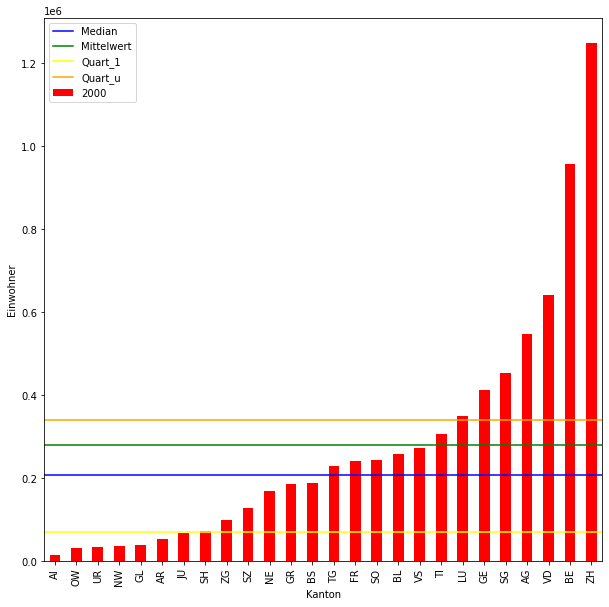

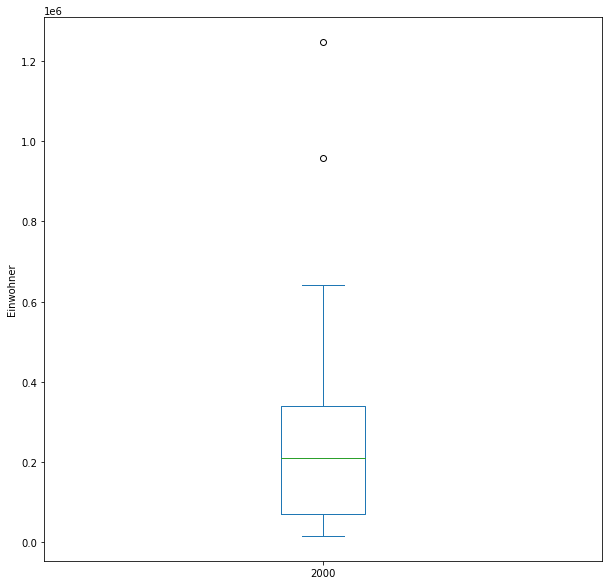

In [30]:
BarYearsWithKanton('2000',True)

In [31]:
def form(kanton,wannaPlot):
    
    df = pd.read_csv('preprocessed/processed_data.csv')
    del df['Unnamed: 0']
    
    data = {'Menge': [],
            'Year': [],
            'Kanton': []
           }

    df2 = pd.DataFrame(data)
    
    for i in years:
        x = df.loc[df['Kanton'] == kanton, i].sum()
        
        dfLoop= pd.DataFrame({"Year":[i],
                              'Menge':[x],
                              'Kanton': kanton})

        df2 = df2.append(dfLoop)
        
    df2 = df2.astype({'Year':float})
    
    
    median = df2['Menge'].median()
    mittelwert = df2['Menge'].mean()
    quart_1, quart_u = np.percentile(df2['Menge'],[25,75])
    
    
    if(wannaPlot):
        df2.plot(kind='bar', x='Year', y='Menge' ,color='red',figsize=(10,10))
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.axhline(y = quart_1, color = 'yellow', linestyle = '-',label="Quart_1")
        plt.axhline(y = quart_u, color = 'orange', linestyle = '-',label="Quart_u")
        
        plt.legend(loc='best')
        plt.show()
        
        df2.plot(kind='box', x='Kanton', y='Menge' ,figsize=(10,10))
        plt.ylabel("Jahr")
        plt.ylabel("Einwohner")
        
    else:
        return df2

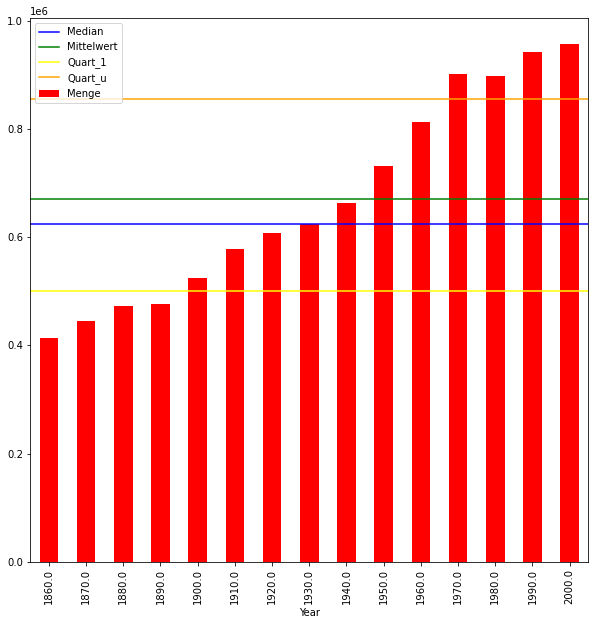

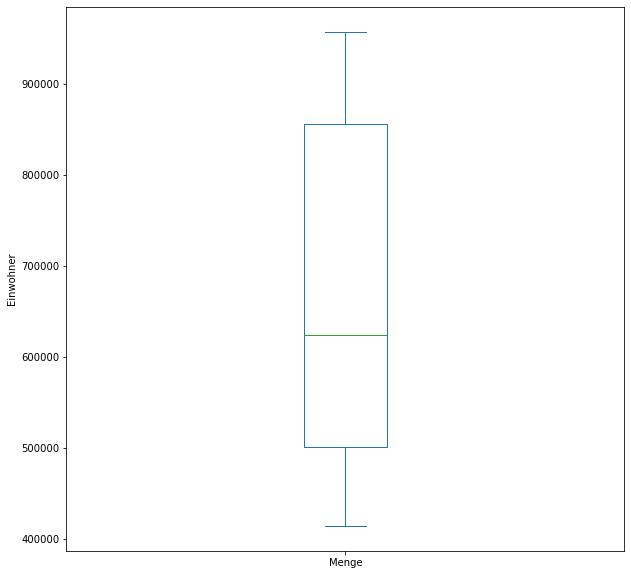

In [64]:
form('BE',True)

In [60]:
def BarYearsWithStaedte(year,kanton,wannaPlot):
    
    df = pd.read_csv('preprocessed/processed_data.csv')
    del df['Unnamed: 0']
    
    y = df.loc[(df['Kanton'] == kanton)]
    staedte = y.Stadt.unique()
    
    data = {'Menge': [],
            'Stadt': [],
            'Year': [],
           }
    
    df2 = pd.DataFrame(data)
    
    for i in staedte:
        x = df.loc[(df['Kanton'] == kanton) & (df['Stadt'] == i) , year].sum()
        
        dfLoop= pd.DataFrame({"Year":[year],
                              'Menge':[x],
                              'Stadt': [i],
                             })
        df2 = df2.append(dfLoop)
        
    median = df2['Menge'].median()
    mittelwert = df2['Menge'].mean()
    
    df3 = df2.sort_values(by = 'Menge',ascending = False)
    
    if(wannaPlot):
        df3.plot(kind='bar', x='Stadt', y='Menge' ,color='red',figsize=(70,10))
        plt.axhline(y = median, color = 'b', linestyle = '-',label="Median")    
        plt.axhline(y = mittelwert, color = 'g', linestyle = '-',label="Mittelwert")
        plt.legend(loc='best')
        plt.show()
        
        df3.plot(kind='box', x='Stadt', y='Menge' ,figsize=(10,10))
        plt.ylabel("Jahr")
        plt.ylabel("Einwohner")
        
    else:
        return df2

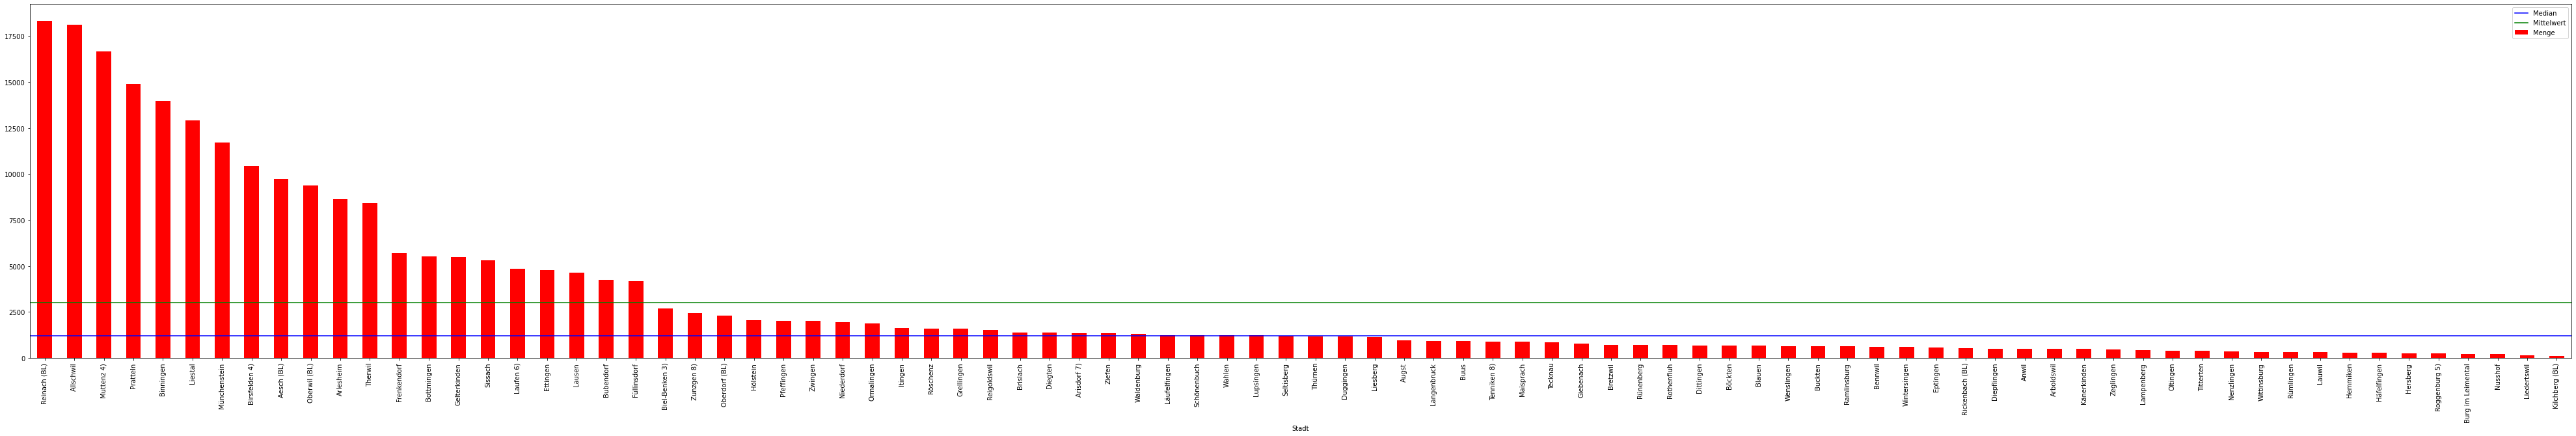

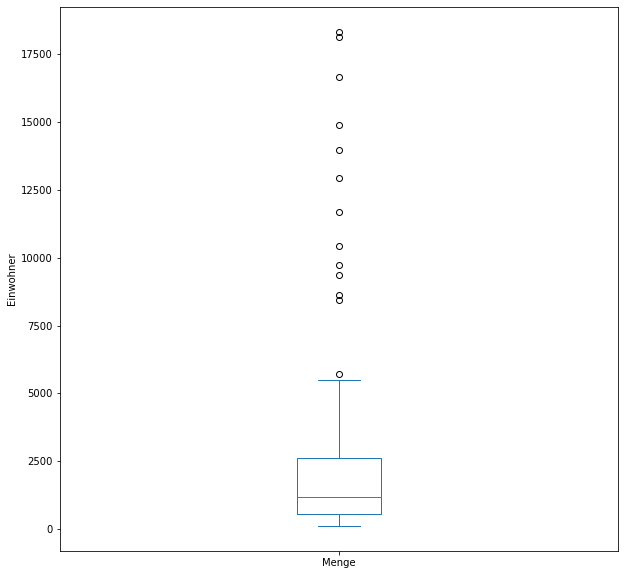

In [69]:
BarYearsWithStaedte('2000','BL' ,True)